<a href="https://colab.research.google.com/github/Hayjaycodes/Investigating-the-Impact-of-Covid-19-on-AirQualityIndex-Pre-During-and-Post-effect-/blob/main/Air_Quality_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import gridspec
import plotly.graph_objs as go
from plotly import tools

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [100]:
#loading datasets
df = pd.read_csv("/content/dataset.csv", encoding='latin-1')

In [99]:
#visualize the first 5 rows in each dataset
df.head()

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,2019,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,2019,Brazil,Itapira,82,Moderate,2,Good,4,Good,7,Good,82,Moderate
2,2019,Brazil,Itapui,32,Good,1,Good,11,Good,1,Good,32,Good
3,2019,Brazil,Itu,156,Unhealthy,4,Good,3,Good,11,Good,156,Unhealthy
4,2019,United States of America,Jacksonville,57,Moderate,1,Good,18,Good,10,Good,57,Moderate


In [101]:
#checking for missing values
np.sum(df.isnull().any(axis=1))

np.int64(406)

In [106]:
#create dataframes for pre-covid, during covid, and post-covid
df2019 = df.loc[df["Year"] == 2019]
df21 = df.loc[df["Year"] == 2021]
df22 = df.loc[df["Year"] == 2022]

In [104]:
#descriptive stats
df2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3497.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0
AQI Value,3497.0,73.601373,58.365186,6.0,40.0,55.0,81.0,500.0
CO AQI Value,3497.0,1.373463,1.865796,0.0,1.0,1.0,1.0,67.0
Ozone AQI Value,3497.0,35.284530,28.354217,0.0,21.0,30.0,40.0,210.0
NO2 AQI Value,3497.0,3.034315,5.125426,0.0,0.0,1.0,4.0,64.0
PM2.5 AQI Value,3497.0,69.922791,56.666335,3.0,36.0,54.0,81.0,500.0


In [103]:
#descriptive stats
df21.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5600.0,2021.000000,0.000000,2021.0,2021.0,2021.0,2021.0,2021.0
AQI Value,5600.0,71.724107,55.985501,7.0,39.0,55.0,79.0,500.0
CO AQI Value,5600.0,1.381964,1.721759,0.0,1.0,1.0,1.0,49.0
Ozone AQI Value,5600.0,35.066071,27.846502,0.0,21.0,31.0,40.0,214.0
NO2 AQI Value,5600.0,3.081607,5.290958,0.0,0.0,1.0,4.0,61.0
PM2.5 AQI Value,5600.0,68.132321,54.778443,0.0,35.0,54.0,78.0,500.0


In [107]:
#descriptive stats
df22.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,8361.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
AQI Value,8361.0,71.287406,54.032188,8.0,39.0,55.0,79.0,500.0
CO AQI Value,8361.0,1.382490,2.057394,0.0,1.0,1.0,1.0,133.0
Ozone AQI Value,8361.0,35.283339,27.942490,0.0,21.0,31.0,40.0,207.0
NO2 AQI Value,8361.0,3.077263,5.404213,0.0,0.0,1.0,3.0,91.0
PM2.5 AQI Value,8361.0,67.733644,53.125353,2.0,34.0,54.0,78.0,500.0


In [108]:
#dropping null values
df.dropna(inplace=True)

In [109]:
#filter air quality index more than 300
df[df['AQI Value'] >300]

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
93,2019,India,Lachhmangarh,500,Hazardous,1,Good,36,Good,0,Good,400,Hazardous
168,2019,India,Kalanwali,405,Hazardous,1,Good,91,Moderate,1,Good,353,Hazardous
176,2019,India,Padampur,500,Hazardous,1,Good,43,Good,0,Good,441,Hazardous
522,2019,Pakistan,Burewala,311,Hazardous,2,Good,109,Unhealthy for Sensitive Groups,1,Good,311,Hazardous
1009,2019,India,Govindgarh,307,Hazardous,1,Good,45,Good,0,Good,307,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21432,2022,India,Chhachhrauli,500,Hazardous,1,Good,82,Moderate,1,Good,461,Hazardous
21528,2022,India,Sisauli,500,Hazardous,1,Good,47,Good,1,Good,500,Hazardous
21823,2022,India,Bilari,500,Hazardous,4,Good,158,Unhealthy,4,Good,457,Hazardous
21841,2022,India,Sikandarabad,500,Hazardous,2,Good,42,Good,3,Good,500,Hazardous


<b>Air Quality Pre-Covid19 Analysis</b>

In [111]:
#create dataframes for pre-covid, during covid, and post-covid
df2019 = df.loc[df["Year"] == 2019]
df21 = df.loc[df["Year"] == 2021]
df22 = df.loc[df["Year"] == 2022]

In [112]:
df2019['AQI Category'].value_counts()

,count
AQI Category,
Good,1421
Moderate,1363
Unhealthy,357
Unhealthy for Sensitive Groups,230
Very Unhealthy,43
Hazardous,34


In [113]:
df21['AQI Category'].value_counts()

,count
AQI Category,
Good,2321
Moderate,2184
Unhealthy,509
Unhealthy for Sensitive Groups,362
Very Unhealthy,73
Hazardous,45


In [114]:
df22['AQI Category'].value_counts()

,count
AQI Category,
Good,3483
Moderate,3210
Unhealthy,817
Unhealthy for Sensitive Groups,550
Very Unhealthy,90
Hazardous,54


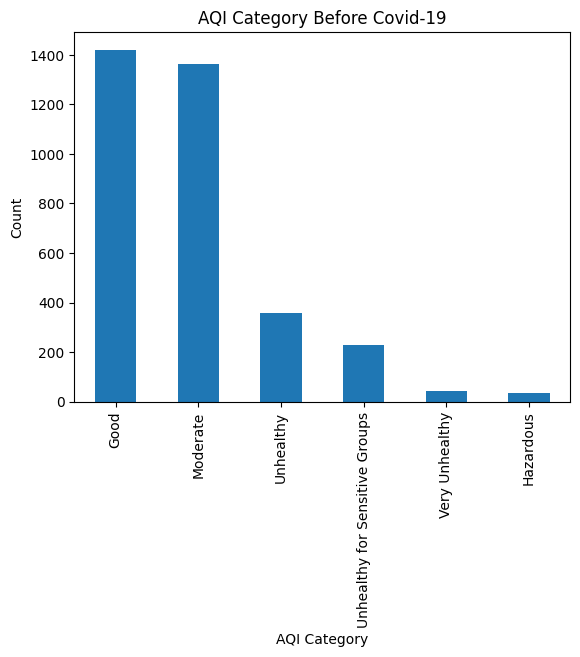

In [115]:
df2019['AQI Category'].value_counts().plot.bar()
plt.title('AQI Category Before Covid-19')
plt.ylabel('Count')
plt.show()

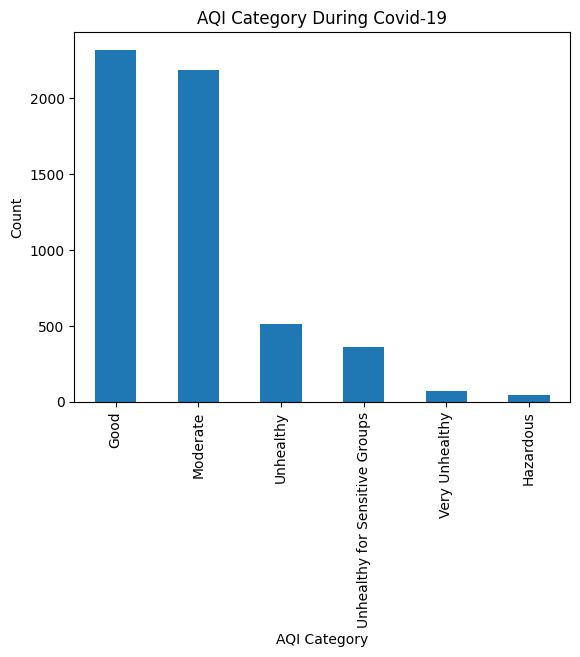

In [116]:
df21['AQI Category'].value_counts().plot.bar()
plt.title('AQI Category During Covid-19')
plt.ylabel('Count')
plt.show()

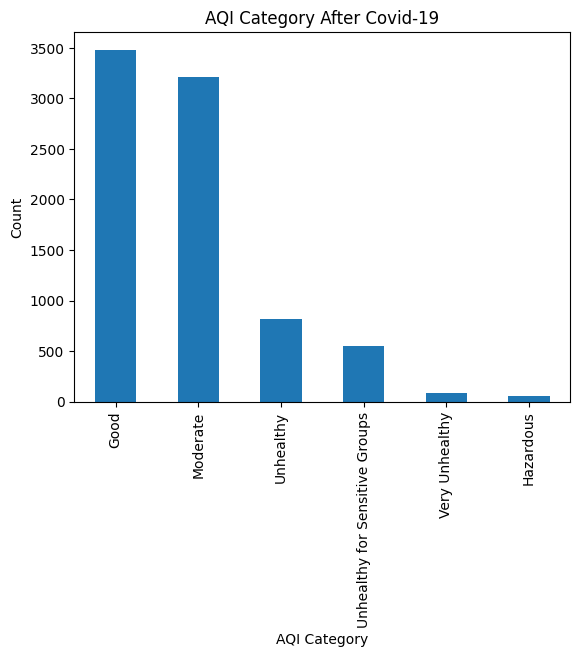

In [117]:
df22['AQI Category'].value_counts().plot.bar()
plt.title('AQI Category After Covid-19')
plt.ylabel('Count')
plt.show()

In [118]:
#cities with maximum air quality index before covid
max_aqi=df2019[df2019['AQI Value']==df2019['AQI Value'].max()]
max_aqi

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
93,2019,India,Lachhmangarh,500,Hazardous,1,Good,36,Good,0,Good,400,Hazardous
176,2019,India,Padampur,500,Hazardous,1,Good,43,Good,0,Good,441,Hazardous
1105,2019,Pakistan,Bahawalnagar,500,Hazardous,1,Good,38,Good,1,Good,466,Hazardous
1299,2019,India,Rania,500,Hazardous,1,Good,40,Good,0,Good,464,Hazardous
1353,2019,India,Gohana,500,Hazardous,1,Good,47,Good,1,Good,500,Hazardous
1440,2019,India,Gunnaur,500,Hazardous,1,Good,73,Moderate,1,Good,500,Hazardous
1449,2019,Pakistan,Harunabad,500,Hazardous,1,Good,43,Good,0,Good,443,Hazardous
1473,2019,India,Khetri,500,Hazardous,1,Good,40,Good,0,Good,376,Hazardous
1531,2019,India,Jahangirpur,500,Hazardous,1,Good,49,Good,1,Good,493,Hazardous
1543,2019,India,Kakrala,500,Hazardous,2,Good,95,Moderate,2,Good,478,Hazardous


In [119]:
#cities with maximum air quality index during covid
max_aqi21=df21[df21['AQI Value']==df21['AQI Value'].max()]
max_aqi21

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
9172,2021,India,Pilibanga,500,Hazardous,1,Good,43,Good,0,Good,470,Hazardous
9767,2021,India,Malaut,500,Hazardous,1,Good,43,Good,2,Good,487,Hazardous
10299,2021,India,Etah,500,Hazardous,1,Good,50,Good,3,Good,437,Hazardous
10632,2021,India,Jagadhri,500,Hazardous,1,Good,74,Moderate,1,Good,470,Hazardous
10634,2021,India,Gopamau,500,Hazardous,1,Good,52,Moderate,1,Good,378,Hazardous
10732,2021,India,Sardulgarh,500,Hazardous,1,Good,40,Good,1,Good,500,Hazardous
11365,2021,India,Niwari,500,Hazardous,1,Good,46,Good,2,Good,492,Hazardous
11497,2021,India,Hastinapur,500,Hazardous,1,Good,50,Good,1,Good,500,Hazardous
11633,2021,India,Giddarbaha,500,Hazardous,1,Good,45,Good,0,Good,416,Hazardous
11640,2021,India,Faridnagar,500,Hazardous,1,Good,45,Good,2,Good,496,Hazardous


In [120]:
#cities with maximum air quality index before covid
max_aqi22=df22[df22['AQI Value']==df21['AQI Value'].max()]
max_aqi22

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
14503,2022,India,Indri,500,Hazardous,1,Good,47,Good,1,Good,500,Hazardous
14702,2022,India,Sasni,500,Hazardous,1,Good,46,Good,1,Good,433,Hazardous
14705,2022,India,Shamli,500,Hazardous,4,Good,77,Moderate,9,Good,426,Hazardous
14720,2022,India,Pokaran,500,Hazardous,0,Good,37,Good,0,Good,500,Hazardous
15144,2022,India,Sunam,500,Hazardous,1,Good,47,Good,0,Good,452,Hazardous
15432,2022,India,Bhadasar,500,Hazardous,1,Good,38,Good,0,Good,500,Hazardous
15774,2022,India,Jhunjhunun,500,Hazardous,1,Good,38,Good,0,Good,433,Hazardous
16206,2022,India,Barkhera,500,Hazardous,2,Good,88,Moderate,1,Good,494,Hazardous
16245,2022,India,Surajgarh,500,Hazardous,1,Good,40,Good,0,Good,464,Hazardous
16394,2022,Russian Federation,Tynda,500,Hazardous,21,Good,8,Good,17,Good,475,Hazardous


In [121]:
#count of polluted cities within a country
max_aqi['Country'].value_counts()

,count
Country,
India,13
Pakistan,4


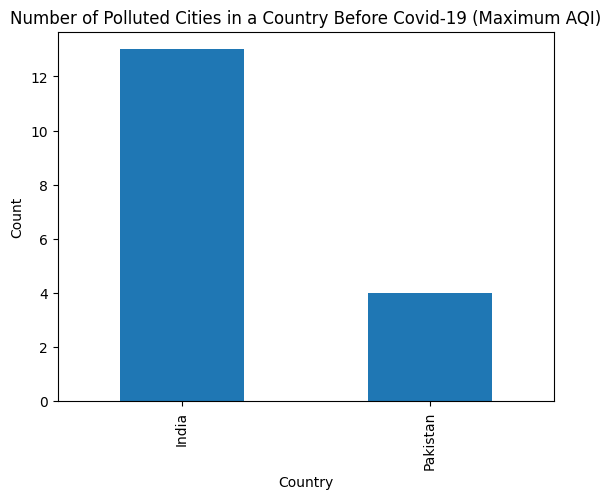

In [122]:
#visualize countries with number of polluted cities
max_aqi['Country'].value_counts().plot.bar()
plt.title('Number of Polluted Cities in a Country Before Covid-19 (Maximum AQI)')
plt.ylabel('Count')
plt.show()

In [123]:
#count of polluted cities within a country
max_aqi21['Country'].value_counts()

,count
Country,
India,23
South Africa,1
Pakistan,1


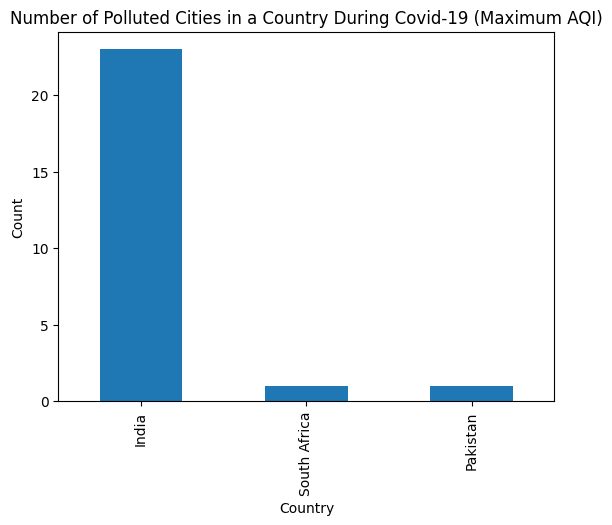

In [124]:
#visualize countries with number of polluted cities
max_aqi21['Country'].value_counts().plot.bar()
plt.title('Number of Polluted Cities in a Country During Covid-19 (Maximum AQI)')
plt.ylabel('Count')
plt.show()

In [125]:
#count of polluted cities within a country
max_aqi22['Country'].value_counts()

,count
Country,
India,28
Russian Federation,1
United States of America,1


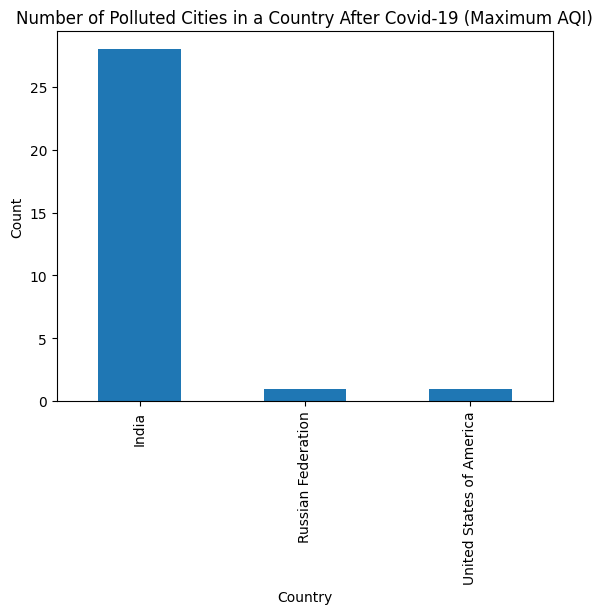

In [126]:
#visualize countries with number of polluted cities
max_aqi22['Country'].value_counts().plot.bar()
plt.title('Number of Polluted Cities in a Country After Covid-19 (Maximum AQI)')
plt.ylabel('Count')
plt.show()

In [127]:
#countries with good air quality
good_AQI_Country19=df2019[df2019['AQI Value'] <=50]
good_AQI_Country19['Country'].value_counts()

,count
Country,
Brazil,170
Russian Federation,148
United States of America,148
Germany,115
Japan,64
...,...
Cambodia,1
Republic of Moldova,1
Ethiopia,1


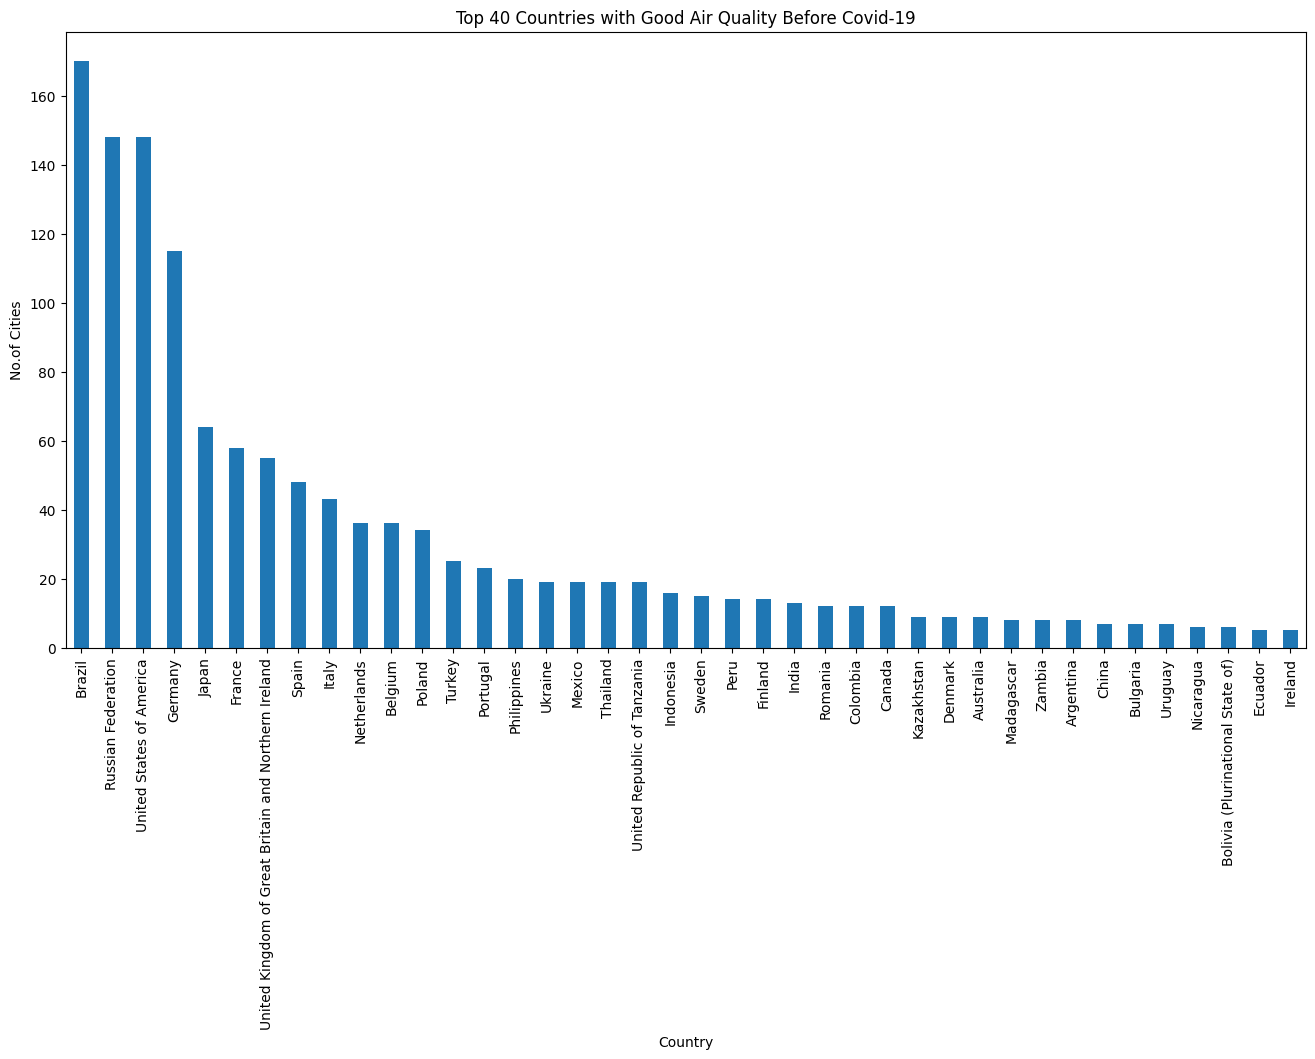

In [128]:
#visualize countries with good air quality
plt.figure(figsize=(16,8))
good_AQI_Country19['Country'].value_counts().head(40).plot.bar()
plt.title('Top 40 Countries with Good Air Quality Before Covid-19')
plt.ylabel('No.of Cities')
plt.show()

In [129]:
#countries with good air quality during covid
good_AQI_Country21=df21[df21['AQI Value'] <=50]
good_AQI_Country21['Country'].value_counts()

,count
Country,
Brazil,283
Russian Federation,246
United States of America,233
Germany,169
Japan,97
...,...
Guatemala,1
Equatorial Guinea,1
Republic of Moldova,1


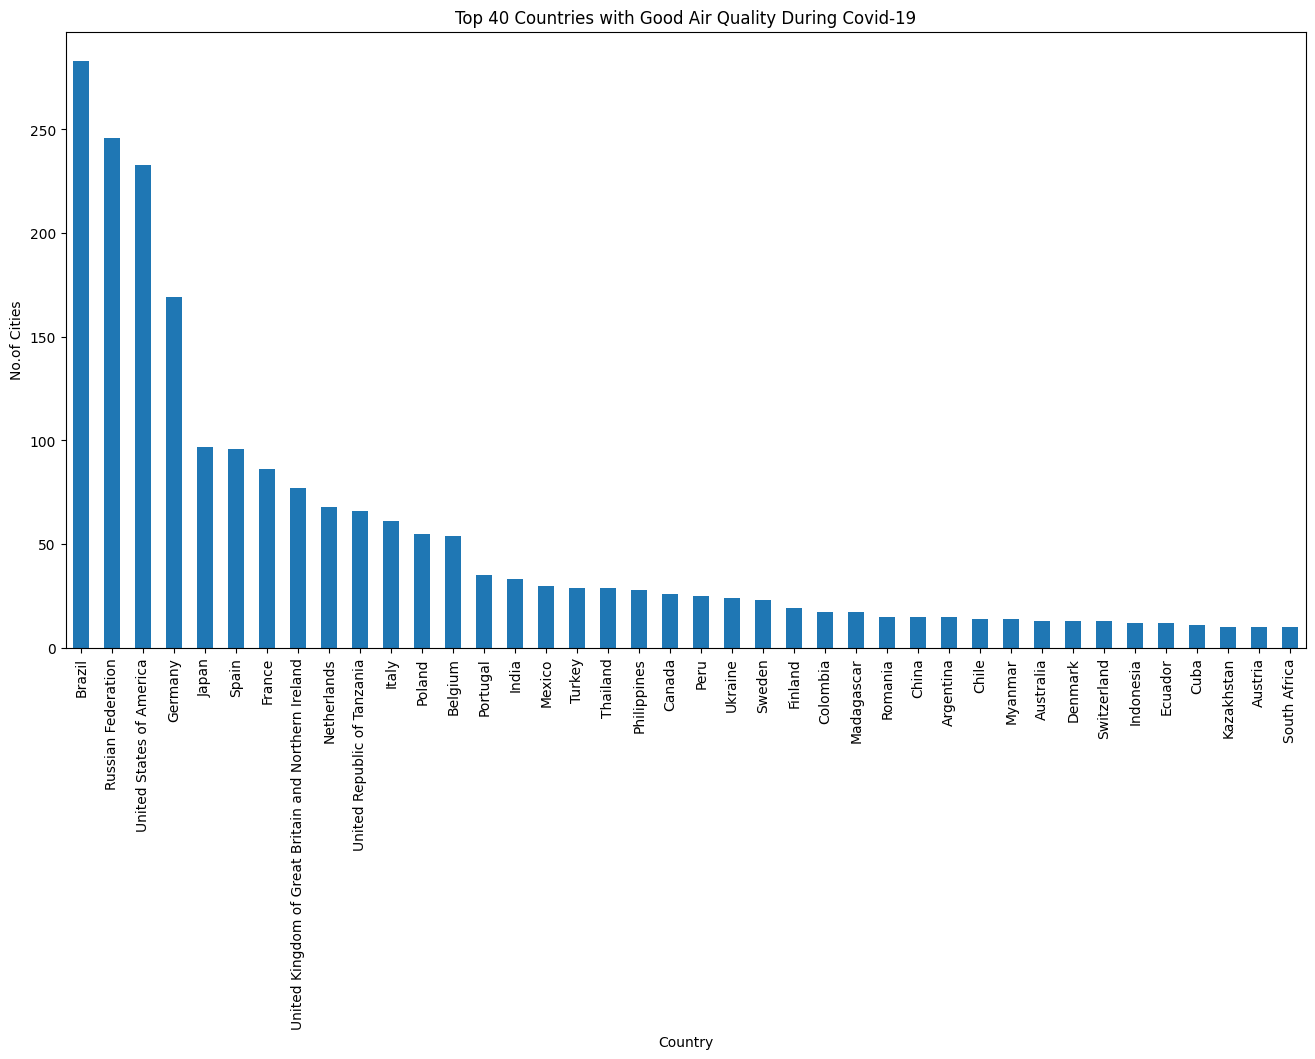

In [130]:
#visualize countries with good air quality during covid
plt.figure(figsize=(16,8))
good_AQI_Country21['Country'].value_counts().head(40).plot.bar()
plt.title('Top 40 Countries with Good Air Quality During Covid-19')
plt.ylabel('No.of Cities')
plt.show()

In [131]:
#countries with good air quality after covid
good_AQI_Country22=df22[df22['AQI Value'] <=50]
good_AQI_Country22['Country'].value_counts()

,count
Country,
Russian Federation,394
Brazil,394
United States of America,381
Germany,258
France,169
...,...
Nepal,1
Guyana,1
Cambodia,1


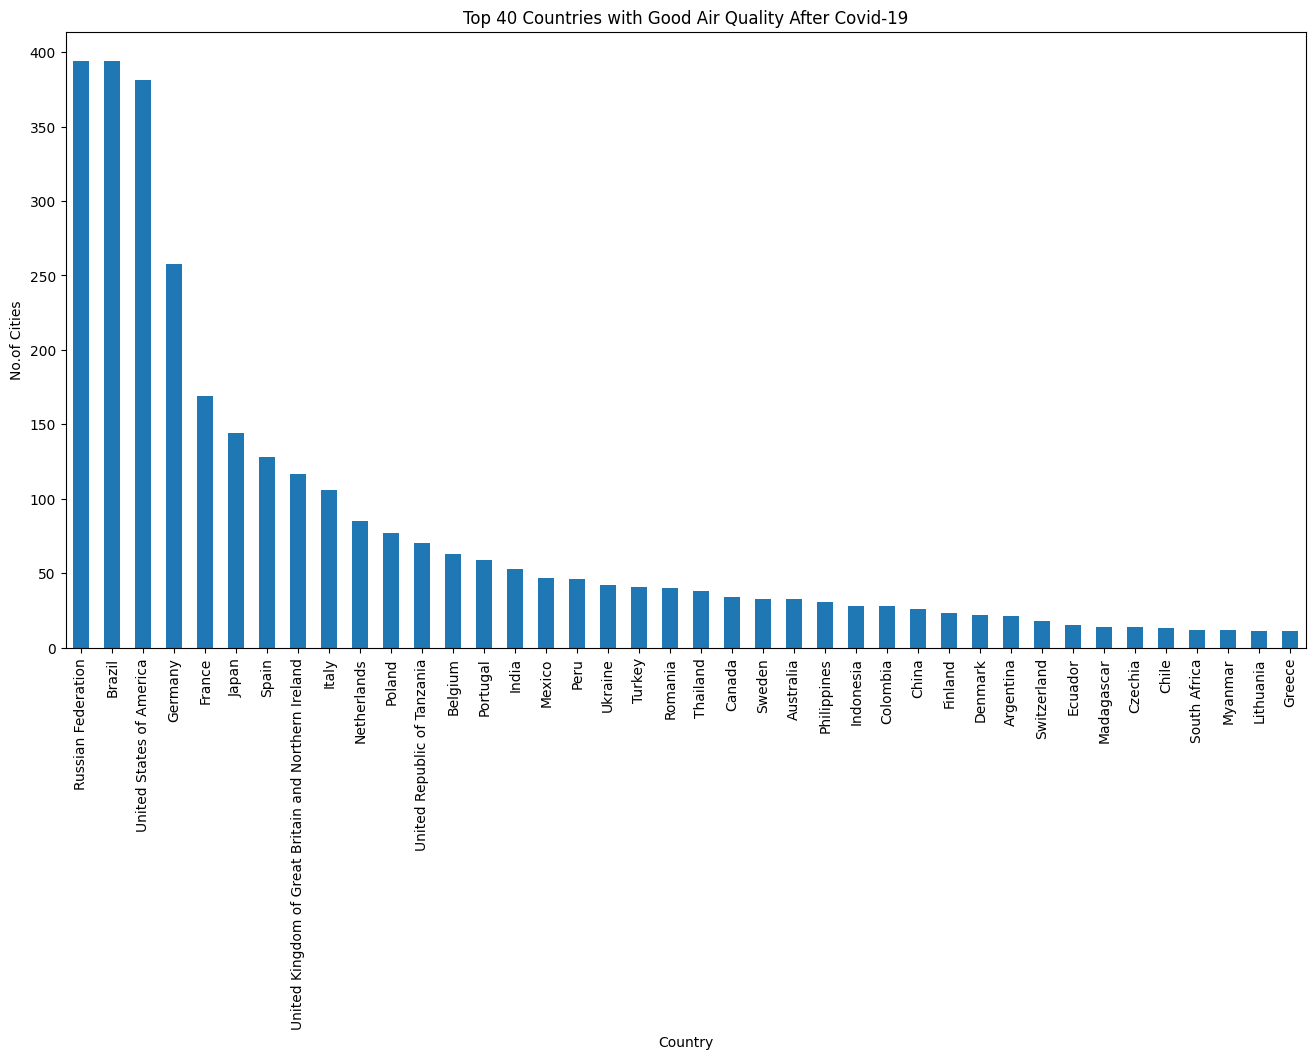

In [54]:
#visualize countries with good air quality after covid
plt.figure(figsize=(16,8))
good_AQI_Country22['Country'].value_counts().head(40).plot.bar()
plt.title('Top 40 Countries with Good Air Quality After Covid-19')
plt.ylabel('No.of Cities')
plt.show()

In [55]:
#count of CO AQI values pre-covid
df2019['CO AQI Value'].value_counts()

,count
CO AQI Value,
1,2148
0,470
2,455
3,188
4,99
5,39
6,13
7,12
9,4


In [56]:
#count of CO AQI values during-covid
df21['CO AQI Value'].value_counts()

,count
CO AQI Value,
1,3491
0,727
2,683
3,287
4,140
5,55
6,37
7,15
9,12


In [57]:
#count of CO AQI values post-covid
df22['CO AQI Value'].value_counts()

,count
CO AQI Value,
1,5240
0,1045
2,1013
3,417
4,261
5,86
6,40
7,22
8,18


In [58]:
#CO AQI values larger than 50 (Very Unhealthy or Hazardous)
df2019[df2019['CO AQI Value']>50]

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
3323,2019,Malaysia,Miri,209,Very Unhealthy,67,Moderate,209,Very Unhealthy,2,Good,157,Unhealthy


In [59]:
#CO AQI values larger than 50 (Very Unhealthy or Hazardous)
df21[df21['CO AQI Value']>50]

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category


In [60]:
#CO AQI values larger than 50 (Very Unhealthy or Hazardous)
df22[df22['CO AQI Value']>50]

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
21113,2022,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous


Text(0.5, 1.0, 'CO AQI Values Distribution Before Covid-19')

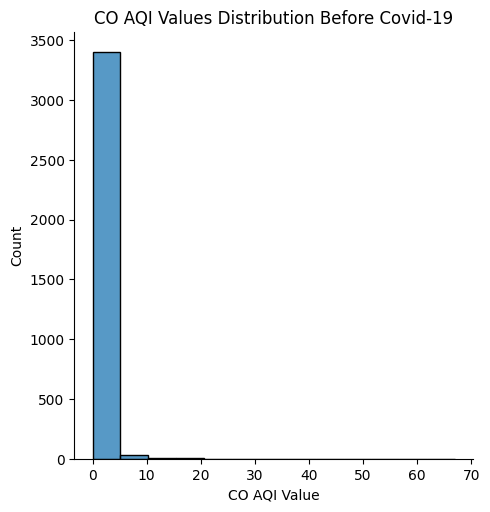

In [61]:
#visualize distribution of CO AQI pre-covid
sns.displot(df2019['CO AQI Value'])
plt.title('CO AQI Values Distribution Before Covid-19')

Text(0.5, 1.0, 'CO AQI Values Distribution During Covid-19')

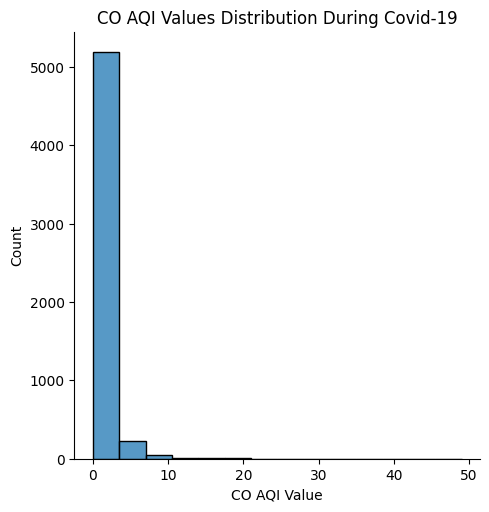

In [62]:
#visualize distribution of CO AQI during covid
sns.displot(df21['CO AQI Value'])
plt.title('CO AQI Values Distribution During Covid-19')

Text(0.5, 1.0, 'CO AQI Values Distribution After Covid-19')

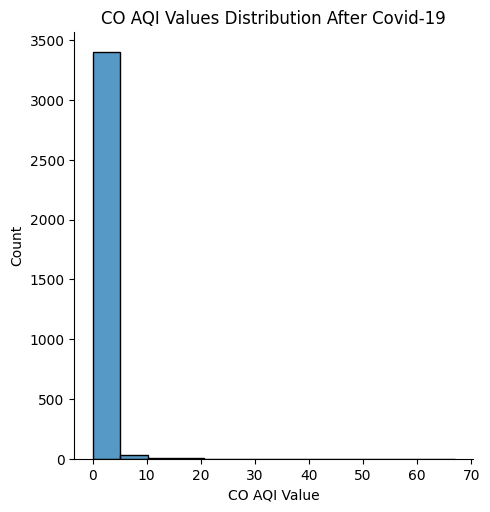

In [63]:
#visualize distribution of CO AQI psot covid
sns.displot(df2019['CO AQI Value'])
plt.title('CO AQI Values Distribution After Covid-19')

In [64]:
#count of NO2 AQI values
df2019['NO2 AQI Value'].value_counts()

,count
NO2 AQI Value,
0,1201
1,708
2,380
3,251
4,186
5,135
6,115
7,80
8,72


In [65]:
#NO2 AQI values larger than 50
df2019[df2019['NO2 AQI Value']>50]

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
444,2019,China,Yizheng,199,Unhealthy,12,Good,0,Good,59,Moderate,199,Unhealthy
2087,2019,Indonesia,Rangkasbitung,225,Very Unhealthy,11,Good,9,Good,63,Moderate,225,Very Unhealthy
2172,2019,China,Chongqing,283,Very Unhealthy,19,Good,0,Good,58,Moderate,283,Very Unhealthy
2390,2019,China,Chengdu,386,Hazardous,28,Good,0,Good,64,Moderate,386,Hazardous


In [66]:
#NO2 AQI values larger than 50
df21[df21['NO2 AQI Value']>50]

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
10849,2021,China,Cholan,168,Unhealthy,5,Good,0,Good,61,Moderate,168,Unhealthy
10861,2021,China,Xiaolingwei,198,Unhealthy,12,Good,1,Good,52,Moderate,198,Unhealthy


In [67]:
#NO2 AQI values larger than 50
df21[df21['NO2 AQI Value']>50]

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
10849,2021,China,Cholan,168,Unhealthy,5,Good,0,Good,61,Moderate,168,Unhealthy
10861,2021,China,Xiaolingwei,198,Unhealthy,12,Good,1,Good,52,Moderate,198,Unhealthy


/tmp/ipython-input-1627602920.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'NO2 AQI Values Distribution Before Covid-19')

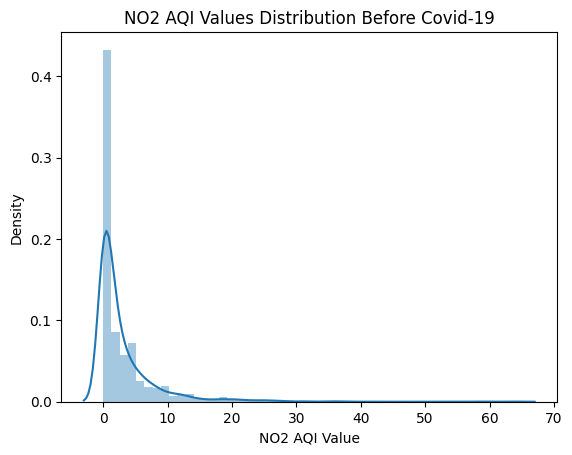

In [68]:
#visualizing NO2 AQI values pre-covid
sns.distplot(df2019['NO2 AQI Value'])
plt.title('NO2 AQI Values Distribution Before Covid-19')

/tmp/ipython-input-2483258107.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'NO2 AQI Values Distribution During Covid-19')

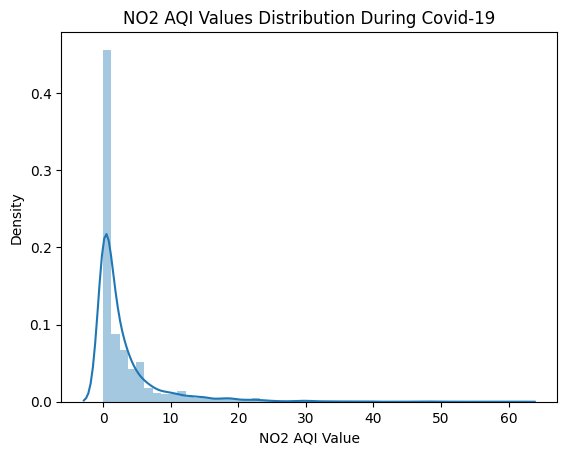

In [69]:
#visualizing NO2 AQI values
sns.distplot(df21['NO2 AQI Value'])
plt.title('NO2 AQI Values Distribution During Covid-19')

/tmp/ipython-input-312719529.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'NO2 AQI Values Distribution After Covid-19')

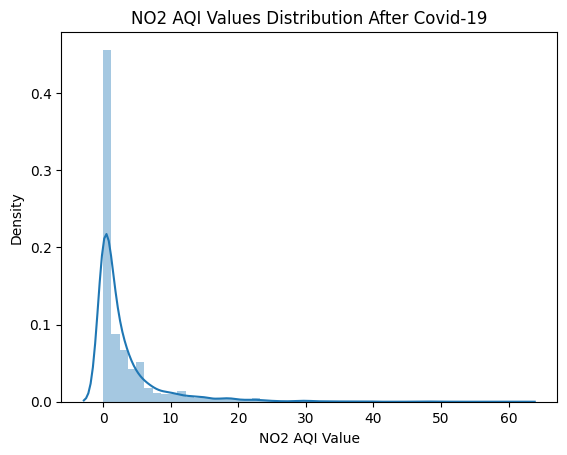

In [70]:
#visualizing NO2 AQI values
sns.distplot(df21['NO2 AQI Value'])
plt.title('NO2 AQI Values Distribution After Covid-19')

In [71]:
#analyze Ozone AQI
df2019['Ozone AQI Value'].value_counts()

,count
Ozone AQI Value,
27,115
30,111
32,102
29,101
28,100
...,...
142,1
165,1
185,1


In [72]:
#count cities with AQI values more than 100 pre-covid
df2019[df2019['Ozone AQI Value']>100]['City'].count()

np.int64(137)

In [73]:
#count cities with AQI values more than 100 during covid
df21[df21['Ozone AQI Value']>100]['City'].count()

np.int64(217)

In [74]:
#count cities with AQI values more than 100 postt-covid
df22[df22['Ozone AQI Value']>100]['City'].count()

np.int64(323)

In [75]:
#cities with Ozone AQI values more than 200
df2019[df2019['Ozone AQI Value']>200].head(10)

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
156,2019,China,Jinan,210,Very Unhealthy,7,Good,210,Very Unhealthy,8,Good,168,Unhealthy
700,2019,China,Chizhou,201,Very Unhealthy,5,Good,201,Very Unhealthy,5,Good,159,Unhealthy
906,2019,China,Hangzhou,203,Very Unhealthy,5,Good,203,Very Unhealthy,5,Good,151,Unhealthy
1442,2019,China,Haian,207,Very Unhealthy,4,Good,207,Very Unhealthy,3,Good,150,Unhealthy
1551,2019,China,Kangshan,201,Very Unhealthy,3,Good,201,Very Unhealthy,4,Good,142,Unhealthy for Sensitive Groups
1736,2019,China,Nantong,206,Very Unhealthy,7,Good,206,Very Unhealthy,9,Good,167,Unhealthy
2002,2019,China,Nantou,202,Very Unhealthy,3,Good,202,Very Unhealthy,10,Good,153,Unhealthy
3323,2019,Malaysia,Miri,209,Very Unhealthy,67,Moderate,209,Very Unhealthy,2,Good,157,Unhealthy
3370,2019,China,Jiangyan,206,Very Unhealthy,5,Good,206,Very Unhealthy,5,Good,150,Unhealthy


In [76]:
#count cities with AQI values more than 200
df2019[df2019['Ozone AQI Value']>200]['City'].count()

np.int64(9)

Text(0.5, 1.0, 'Ozone AQI Values Distribution Before Covid-19')

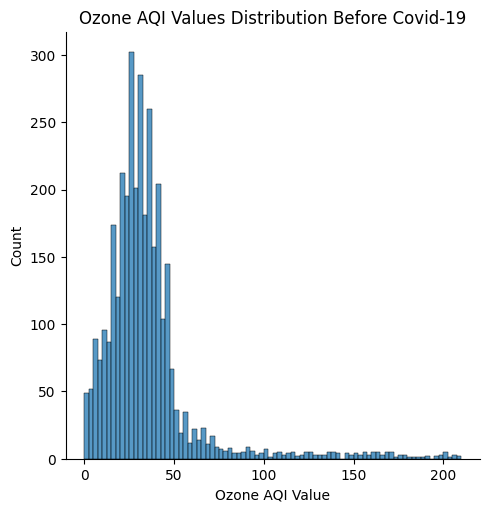

In [77]:
#visualize distribution of Ozone AQI pre-covid
#plt.figure(figsize=(20,8))
sns.displot(df2019['Ozone AQI Value'])
plt.title('Ozone AQI Values Distribution Before Covid-19')

Text(0.5, 1.0, 'Ozone AQI Values Distribution During Covid-19')

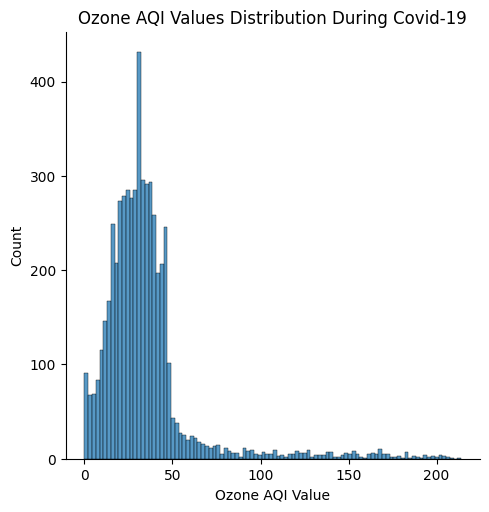

In [78]:
#visualize distribution of Ozone AQI during covid
#plt.figure(figsize=(20,8))
sns.displot(df21['Ozone AQI Value'])
plt.title('Ozone AQI Values Distribution During Covid-19')

Text(0.5, 1.0, 'Ozone AQI Values Distribution After Covid-19')

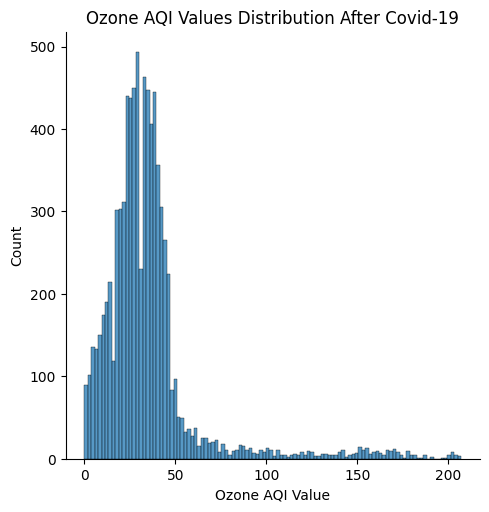

In [79]:
#visualize distribution of Ozone AQI After Covid
#plt.figure(figsize=(20,8))
sns.displot(df22['Ozone AQI Value'])
plt.title('Ozone AQI Values Distribution After Covid-19')

In [80]:
#filter countries with PM2.5 AQIvalues more than 100
df2019[df2019['PM2.5 AQI Value']>100]

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
3,2019,Brazil,Itu,156,Unhealthy,4,Good,3,Good,11,Good,156,Unhealthy
5,2019,India,Jagraon,175,Unhealthy,4,Good,114,Unhealthy for Sensitive Groups,9,Good,175,Unhealthy
6,2019,Pakistan,Jand,146,Unhealthy for Sensitive Groups,3,Good,136,Unhealthy for Sensitive Groups,6,Good,146,Unhealthy for Sensitive Groups
9,2019,Pakistan,Jhang,208,Very Unhealthy,2,Good,156,Unhealthy,1,Good,208,Very Unhealthy
10,2019,China,Jiayuguan,174,Unhealthy,1,Good,49,Good,0,Good,174,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,2019,Dominican Republic,San Francisco De Macoris,151,Unhealthy,2,Good,9,Good,12,Good,151,Unhealthy
3457,2019,South Africa,Winburg,131,Unhealthy for Sensitive Groups,6,Good,14,Good,6,Good,131,Unhealthy for Sensitive Groups
3468,2019,China,Zhucheng,162,Unhealthy,3,Good,162,Unhealthy,2,Good,113,Unhealthy for Sensitive Groups
3483,2019,South Africa,Pietermaritzburg,215,Very Unhealthy,13,Good,3,Good,13,Good,215,Very Unhealthy


In [81]:
#filter countries with PM2.5 AQIvalues more than 100
df21[df21['PM2.5 AQI Value']>100]

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
8509,2021,India,Kumhari,160,Unhealthy,3,Good,39,Good,5,Good,160,Unhealthy
8516,2021,China,Liangxiang,160,Unhealthy,5,Good,24,Good,30,Good,160,Unhealthy
8524,2021,India,Sirsilla,176,Unhealthy,2,Good,37,Good,8,Good,176,Unhealthy
8550,2021,Indonesia,Purwokerto,178,Unhealthy,9,Good,14,Good,22,Good,178,Unhealthy
8552,2021,India,Qadian,162,Unhealthy,4,Good,41,Good,9,Good,162,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14069,2021,India,Vejalpur,149,Unhealthy for Sensitive Groups,1,Good,41,Good,0,Good,149,Unhealthy for Sensitive Groups
14074,2021,China,Yongchang,153,Unhealthy,2,Good,40,Good,6,Good,153,Unhealthy
14075,2021,India,Zahirabad,134,Unhealthy for Sensitive Groups,1,Good,41,Good,0,Good,134,Unhealthy for Sensitive Groups
14086,2021,India,Garulia,216,Very Unhealthy,4,Good,96,Moderate,5,Good,216,Very Unhealthy


In [82]:
#filter countries with PM2.5 AQIvalues more than 100
df22[df22['PM2.5 AQI Value']>100]

,Year,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
14107,2022,China,Dinghai,139,Unhealthy for Sensitive Groups,3,Good,135,Unhealthy for Sensitive Groups,1,Good,139,Unhealthy for Sensitive Groups
14111,2022,India,Paithan,120,Unhealthy for Sensitive Groups,1,Good,34,Good,0,Good,120,Unhealthy for Sensitive Groups
14115,2022,India,Peddapalli,140,Unhealthy for Sensitive Groups,1,Good,38,Good,0,Good,140,Unhealthy for Sensitive Groups
14125,2022,China,Xunchang,156,Unhealthy,7,Good,44,Good,17,Good,156,Unhealthy
14129,2022,China,Yingko,141,Unhealthy for Sensitive Groups,3,Good,141,Unhealthy for Sensitive Groups,1,Good,114,Unhealthy for Sensitive Groups
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22428,2022,Mexico,Tlaltelulco,181,Unhealthy,3,Good,2,Good,11,Good,181,Unhealthy
22435,2022,Nigeria,Hadejia,141,Unhealthy for Sensitive Groups,4,Good,42,Good,2,Good,141,Unhealthy for Sensitive Groups
22438,2022,Venezuela (Bolivarian Republic of),Villa De Cura,131,Unhealthy for Sensitive Groups,2,Good,9,Good,10,Good,131,Unhealthy for Sensitive Groups
22448,2022,China,Wangqing,101,Unhealthy for Sensitive Groups,3,Good,35,Good,2,Good,101,Unhealthy for Sensitive Groups


Text(0, 0.5, 'Count')

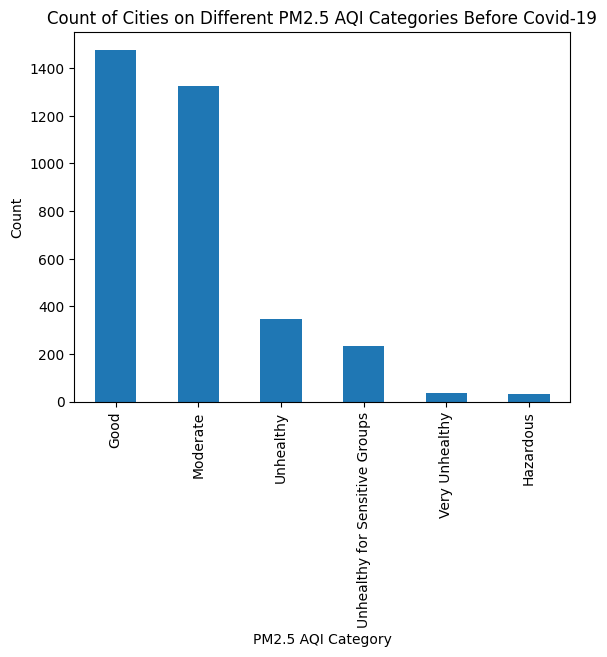

In [83]:
#visualize categories of AQI values pre-covid
df2019['PM2.5 AQI Category'].value_counts().plot.bar()
plt.title('Count of Cities on Different PM2.5 AQI Categories Before Covid-19')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

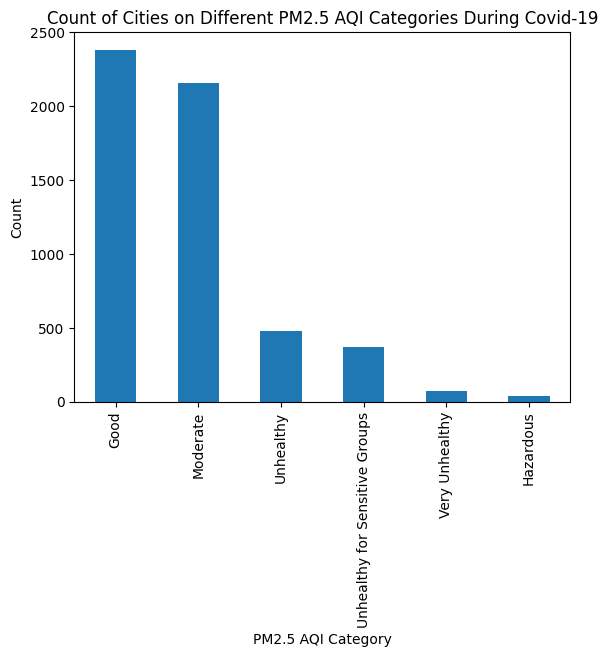

In [84]:
#visualize categories of AQI values during covid
df21['PM2.5 AQI Category'].value_counts().plot.bar()
plt.title('Count of Cities on Different PM2.5 AQI Categories During Covid-19')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

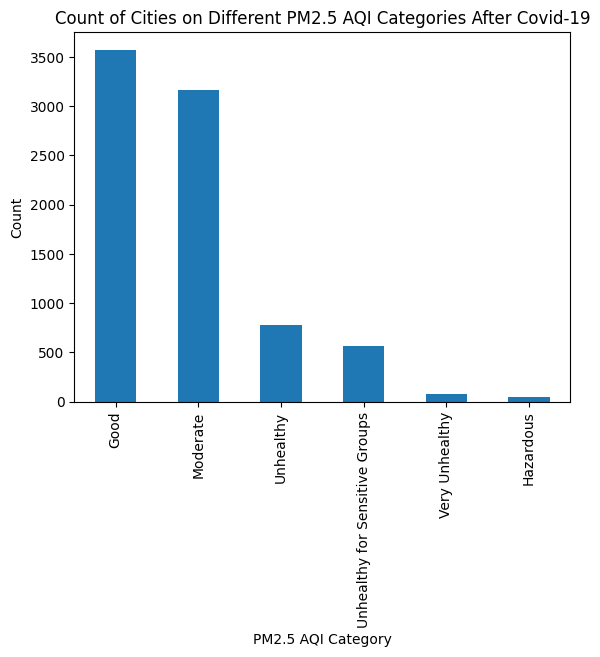

In [85]:
#visualize categories of AQI values post-covid
df22['PM2.5 AQI Category'].value_counts().plot.bar()
plt.title('Count of Cities on Different PM2.5 AQI Categories After Covid-19')
plt.ylabel('Count')

In [86]:
df2019['PM2.5 AQI Category'].value_counts()

,count
PM2.5 AQI Category,
Good,1478
Moderate,1324
Unhealthy,345
Unhealthy for Sensitive Groups,233
Very Unhealthy,36
Hazardous,32


In [87]:
df21['PM2.5 AQI Category'].value_counts()

,count
PM2.5 AQI Category,
Good,2382
Moderate,2153
Unhealthy,480
Unhealthy for Sensitive Groups,371
Very Unhealthy,69
Hazardous,39


In [88]:
df22['PM2.5 AQI Category'].value_counts()

,count
PM2.5 AQI Category,
Good,3572
Moderate,3162
Unhealthy,775
Unhealthy for Sensitive Groups,567
Very Unhealthy,79
Hazardous,49


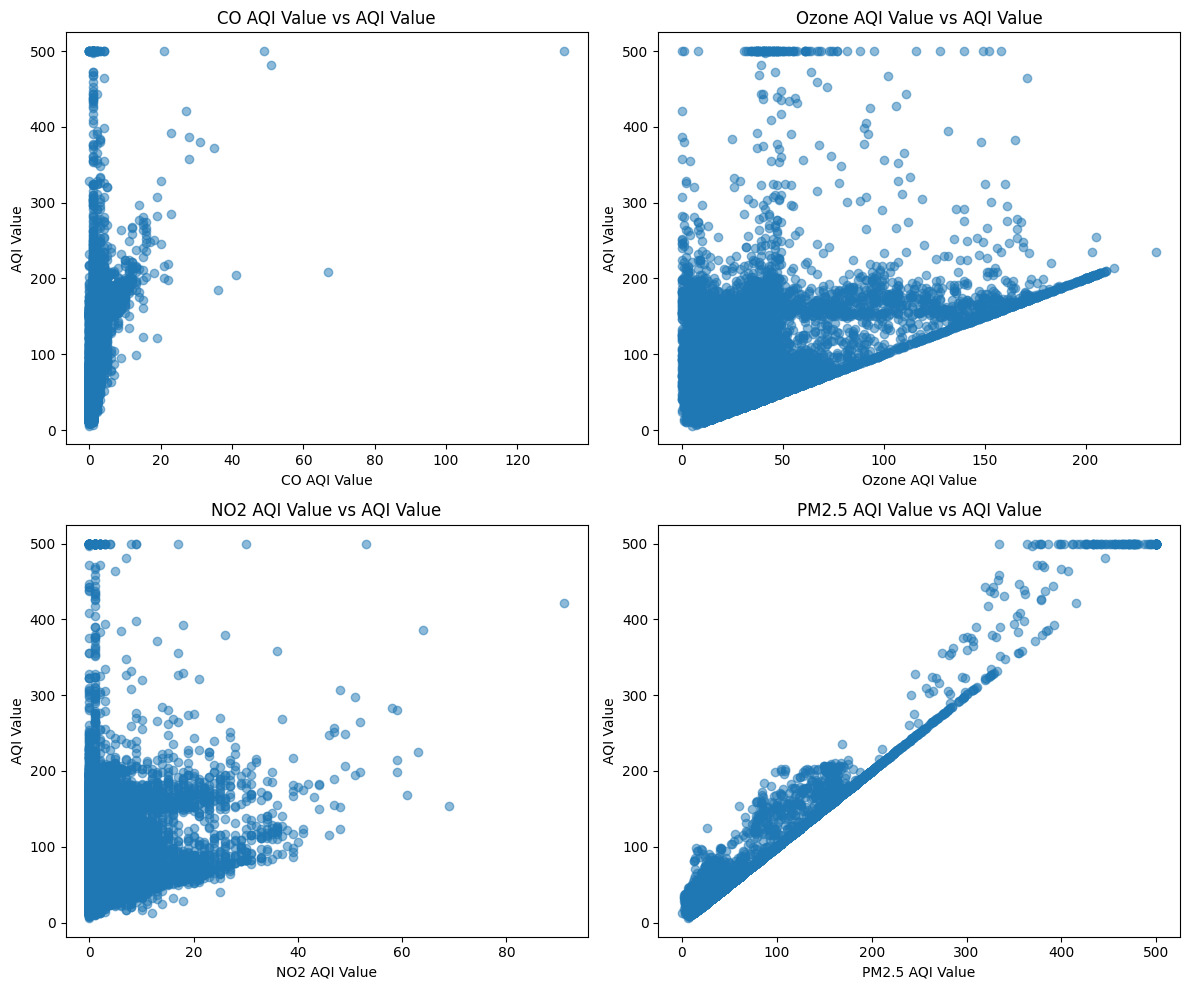

In [89]:
#scatter plots of correlation between air pollutants and air quality value pre-covid
pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
aqi_values = df['AQI Value']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    ax.scatter(df[pollutants[i]], aqi_values, alpha=0.5)
    ax.set_xlabel(pollutants[i])
    ax.set_ylabel('AQI Value')
    ax.set_title(f'{pollutants[i]} vs AQI Value')

plt.tight_layout()
plt.show()

In [90]:
#variables correlation
df.corr(numeric_only=True)

,Year,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
Year,1.000000,-0.013540,0.006821,-0.000084,0.006248,-0.013964
AQI Value,-0.013540,1.000000,0.428919,0.401750,0.234268,0.984376
CO AQI Value,0.006821,0.428919,1.000000,0.140648,0.488005,0.437042
Ozone AQI Value,-0.000084,0.401750,0.140648,1.000000,-0.183038,0.336447
NO2 AQI Value,0.006248,0.234268,0.488005,-0.183038,1.000000,0.262639
PM2.5 AQI Value,-0.013964,0.984376,0.437042,0.336447,0.262639,1.000000


In [91]:
#Machine Learning Modelling
#Separating input features and target variable
X=df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value',	'PM2.5 AQI Value']]
y=df['AQI Value']

In [92]:
#Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =3625235)

In [93]:
#fitting random forest regression
rf = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rf.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [94]:
#checking model performance
# Access the OOB Score
oob_score = rf.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = rf.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

#r2 = r2_score(y, predictions)
#print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9574257784765066
Mean Squared Error: 1.4608215451577806


In [95]:
#fitting linear regress
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [96]:
#checking model performance
r2_score = LR.score(X_test,y_test)
print(r2_score*100,'%')

97.50980404440932 %
